In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time


T_i = 150*1.602e-13
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
Énergie_moyenne_excitation_eau = 75*1.602e-19
Énergie_moyenne_excitation_os = 91.9*1.602e-19
rho_eau = 997
rho_os = 1850
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.022e23
    masse_atomique = {1: 0.001007975, 6: 0.0120106, 7: 0.014006855, 8: 0.0159940, 12: 0.0243055, 15: 0.03097396200, 16: 0.0320675, 20: 0.040078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique
eau = [(1, 0.111894), (8, 0.888106)]#
densité_électronique_eau = densité_électronique(eau, 997)
os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
densité_électronique_os = densité_électronique(os, 1850)
def f_eau(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau)**2))-2*(Beta**2))
    return rho_eau/S_col_eau
def f_os(T):
    gamma = T/(m_p*c**2) + 1
    Beta = np.sqrt((gamma**2-1)/gamma**2)
    a = 2*m_e*c**2
    b = 1 + (m_e/m_p)**2
    delta = 2*m_e/m_p
    T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
    S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os)**2))-2*(Beta**2))
    return rho_os/S_col_os
def trap_eau(N):
    a = 3*1.602e-13
    b = T_i
    h = (b-a)/N
    s = 0.5*f_eau(a) + 0.5*f_eau(b)
    for k in range(1,N):
        s += f_eau(a+k*h)
    return (h*s)
def trap_os(N):
    a = 3*1.602e-13
    b = T_i
    h = (b-a)/N
    s = 0.5*f_os(a) + 0.5*f_os(b)
    for k in range(1,N):
        s += f_os(a+k*h)
    return (h*s)

tranches_eau = 2
tranches_os = 2

nb_échantillons = []
portée_trap_eau = []
erreur_trap_eau = []
portée_romb_eau = []
erreur_romb_eau = []

portée_trap_os  = []
erreur_trap_os = []
portée_romb_os  = []
erreur_romb_os = []


for x in range(20):
    I_ii = trap_eau(tranches_eau*2)
    I_i = trap_eau(tranches_eau)
    eps = (1/3)*(I_ii-I_i)
    erreur_trap_eau.append(abs(eps))
    print(eps)
    print(tranches_eau)
    nb_échantillons.append(tranches_eau)
    tranches_eau *= 2
    portée_trap_eau.append(I_ii)

for x in range(20):
    I_ii = trap_os(tranches_os*2)
    I_i = trap_os(tranches_os)
    eps = (1/3)*(I_ii-I_i)
    erreur_trap_os.append(abs(eps))
    print(eps)
    print(tranches_os)
    tranches_os *= 2
    portée_trap_os.append(I_ii)


'''Romberg eau'''
def romberg_eau(t):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_eau(2**x)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R
'''Romberg os'''
def romberg_os(t):
    R = np.zeros((t, t))
    for x in range(0, t):
        R[x, 0] = trap_os(2**x)
        for j in range(0, x):
            R[x, j+1] = R[x, j] + (1/((4**(j+1))-1)) * (R[x,j]-R[x-1,j])
    return R



for x in range(1,21):
    R = romberg_eau(x)
    i = R[x-1]
    eps = (1/(4**(x)-1))*(i[x-2]-R[x-2][x-2])
    portée_romb_eau.append(i[x-2])
    erreur_romb_eau.append(abs(eps))

for x in range(1,21):
    R = romberg_os(x)
    i = R[x-1]
    eps = (1/(4**(x)-1))*(i[x-2]-R[x-2][x-2])
    portée_romb_os.append(i[x-2])
    erreur_romb_os.append(abs(eps))






1.1177254320100758
2
0.3113431201785393
4
0.08414263582320321
8
0.022067298584602213
16
0.005648460222043164
32
0.0014249122370605012
64
0.0003572181303184152
128
8.937145046653919e-05
256
2.2347142760281713e-05
512
5.587054971556427e-06
1024
1.39678049511834e-06
2048
3.4919599064172263e-07
4096
8.729929845685547e-08
8192
2.182463276767521e-08
16384
5.45628608961124e-09
32768
1.3645167958505529e-09
65536
3.400183838190666e-10
131072
8.530302390378589e-11
262144
2.1846820648837213e-11
524288
6.679101716144942e-12
1048576
1.2130484772059256
2
0.3385166385916894
4
0.09160816053035128
8
0.02404429591809768
16
0.006156730091011771
32
0.0015533199873895378
64
0.0003894219267219038
128
9.7429210863235e-05
256
2.4362016792641345e-05
512
6.090800610536462e-06
1024
1.5227185391116411e-06
2048
3.806809919145356e-07
4096
9.517038771870526e-08
8192
2.3792040337866638e-08
16384
5.948417462301828e-09
32768
1.4879807016162279e-09
65536
3.7129173809565447e-10
131072
9.25221380991085e-11
262144
2.166681

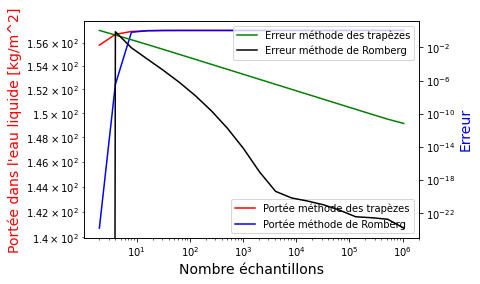

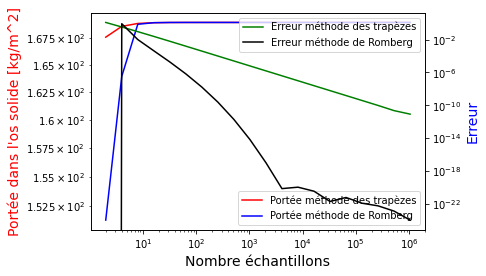

In [4]:
'''Figure pour l'eau'''
fig,ax = plt.subplots()
# make a plot
ax.plot(nb_échantillons, portée_trap_eau, color="red", label = '''Portée méthode des trapèzes''')
ax.plot(nb_échantillons, portée_romb_eau, color="blue", label = '''Portée méthode de Romberg''')
# set x-axis label
ax.set_xlabel("Nombre échantillons",fontsize=14 )
ax.set_xscale('log')
ax.set_yscale('log')
# set y-axis label
ax.set_ylabel("Portée dans l'eau liquide [kg/m^2]",color="red",fontsize=14)
plt.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(nb_échantillons, erreur_trap_eau,color="green", label = '''Erreur méthode des trapèzes''')
ax2.plot(nb_échantillons, erreur_romb_eau,color="black", label = '''Erreur méthode de Romberg''')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel("Erreur",color="blue",fontsize=14)
plt.legend()
plt.show()

''''Figure pour l'os'''
fig,ax = plt.subplots()
# make a plot
ax.plot(nb_échantillons, portée_trap_os, color="red", label = '''Portée méthode des trapèzes''')
ax.plot(nb_échantillons, portée_romb_os, color="blue", label = '''Portée méthode de Romberg''')
# set x-axis label
ax.set_xlabel("Nombre échantillons",fontsize=14 )
ax.set_xscale('log')
ax.set_yscale('log')
# set y-axis label
ax.set_ylabel("Portée dans l'os solide [kg/m^2]",color="red",fontsize=14)
plt.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(nb_échantillons, erreur_trap_os,color="green", label = '''Erreur méthode des trapèzes''')
ax2.plot(nb_échantillons, erreur_romb_os,color="black", label = '''Erreur méthode de Romberg''')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel("Erreur",color="blue",fontsize=14)
plt.legend()
plt.show()
